In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam


In [2]:
df = pd.read_csv('well_data.csv', index_col=0)
print(df)

        CHK       PWH       PDC       TWH      FGAS      FOIL       QTOT
0     0.540  0.542755  0.211586  0.594760  0.138882  0.861118  32.358228
1     0.540  0.542755  0.211586  0.594760  0.142222  0.857774  32.940225
2     0.894  0.458000  0.222654  0.616555  0.144697  0.855303  48.633042
3     0.894  0.452311  0.222556  0.609029  0.144938  0.855056  48.065657
4     0.894  0.443485  0.221839  0.602488  0.144187  0.855807  47.096656
...     ...       ...       ...       ...       ...       ...        ...
3094  0.534  0.462606  0.215561  0.592627  0.128039  0.826061  28.108285
3095  0.534  0.462854  0.216331  0.589506  0.127935  0.825378  28.119254
3096  0.534  0.463855  0.239411  0.594895  0.127857  0.824711  27.875849
3097  0.415  0.498174  0.234317  0.581882  0.129256  0.833875  18.412828
3098  0.541  0.463279  0.216901  0.592885  0.127476  0.822423  28.678289

[3099 rows x 7 columns]


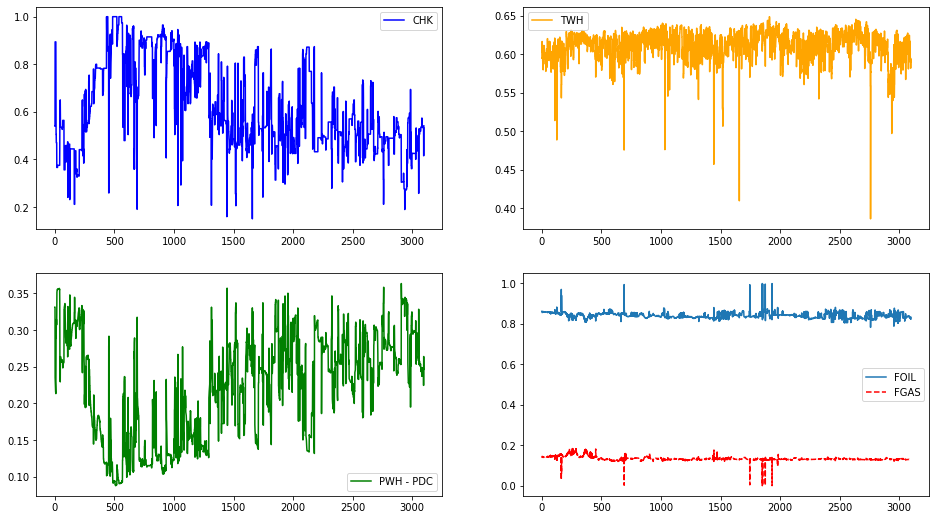

In [3]:
fig, ax = plt.subplots(2, 2, figsize=(16, 9))

# Choke valve opening
ax[0, 0].plot(df['CHK'], label='CHK', color="blue")
ax[0, 0].legend()

# Total flow through choke valve
ax[0, 1].plot(df['TWH'], label='TWH', color='orange')
ax[0, 1].legend()

# Diff pressure over choke valve
ax[1, 0].plot(df['PWH'] - df['PDC'], label='PWH - PDC', color='green')
ax[1, 0].legend()

# Fractions
ax[1, 1].plot(df['FOIL'], label='FOIL')
ax[1, 1].plot(df['FGAS'], '--r', label='FGAS')
ax[1, 1].legend()

# Split into training and test data



In [4]:
test_set = df.iloc[2000:2500]

train_val_set = df.copy().drop(test_set.index) 

val_set = train_val_set.sample(frac=0.1, replace=False)
train_set = train_val_set.copy().drop(val_set.index)

n_points = len(train_set) + len(val_set) + len(test_set)
print(f'{len(df)} = {len(train_set)} + {len(val_set)} + {len(test_set)} = {n_points}')


#from sklearn.utils import shuffle
#x_train, y_train = shuffle(x_train, y_train)

3099 = 2339 + 260 + 500 = 3099


In [5]:

x_test = test_set.drop(columns='QTOT')
y_test = test_set[['QTOT']]


x_train = train_val_set.drop(columns='QTOT')
y_train = train_val_set[['QTOT']]

x_val = val_set.drop(columns='QTOT')
y_val = val_set[['QTOT']]

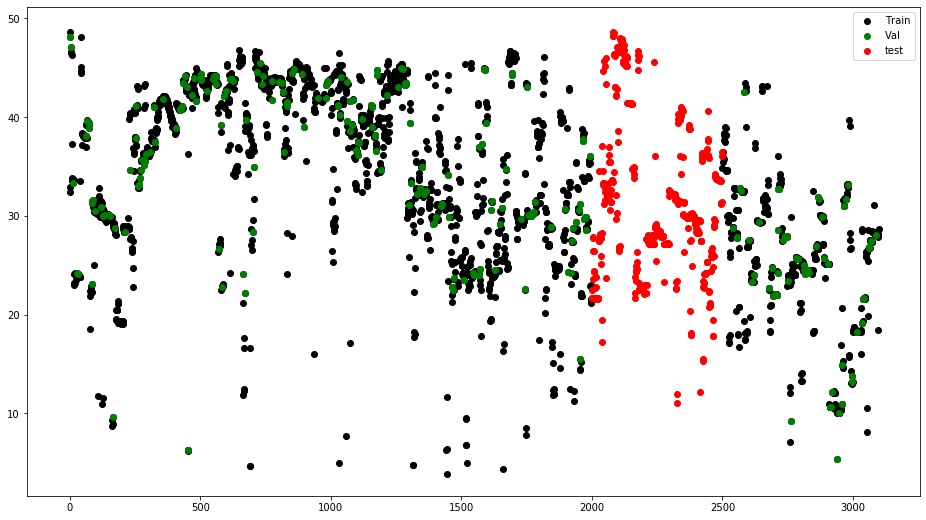

In [6]:
plt.figure(figsize=(16,9))
plt.scatter(y_train.index, y_train.values, color='black', label='Train')
plt.scatter(val_set.index, val_set['QTOT'], color='green', label='Val')
plt.scatter(y_test.index, y_test.values, color='red', label='test')
plt.legend()

In [7]:
from keras import regularizers


model = keras.Sequential()

model.add(keras.layers.Dense(6, activation='relu', input_shape=(6,)))
model.add(keras.layers.Dense(50, activation='relu', bias_regularizer=regularizers.l2(0.001)))
model.add(keras.layers.Dense(50, activation='relu', bias_regularizer=regularizers.l2(0.001)))
model.add(keras.layers.Dense(1))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 42        
_________________________________________________________________
dense_1 (Dense)              (None, 50)                350       
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 2,993
Trainable params: 2,993
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [10]:


model.fit(x_train,y_train,validation_data=(x_val, y_val),epochs=100, batch_size=10, verbose=2)

Epoch 1/100
260/260 - 0s - loss: 419.1373 - val_loss: 51.6175
Epoch 2/100
260/260 - 0s - loss: 51.3577 - val_loss: 42.5709
Epoch 3/100
260/260 - 0s - loss: 40.4785 - val_loss: 31.5177
Epoch 4/100
260/260 - 0s - loss: 27.4066 - val_loss: 20.1510
Epoch 5/100
260/260 - 0s - loss: 15.9852 - val_loss: 12.3339
Epoch 6/100
260/260 - 0s - loss: 11.0775 - val_loss: 11.2148
Epoch 7/100
260/260 - 0s - loss: 9.9289 - val_loss: 10.9708
Epoch 8/100
260/260 - 0s - loss: 9.1674 - val_loss: 9.7369
Epoch 9/100
260/260 - 0s - loss: 8.3834 - val_loss: 8.8568
Epoch 10/100
260/260 - 0s - loss: 7.7515 - val_loss: 8.0302
Epoch 11/100
260/260 - 0s - loss: 7.3585 - val_loss: 7.5125
Epoch 12/100
260/260 - 0s - loss: 6.8866 - val_loss: 7.3231
Epoch 13/100
260/260 - 0s - loss: 6.5655 - val_loss: 7.1016
Epoch 14/100
260/260 - 0s - loss: 6.4723 - val_loss: 6.6202
Epoch 15/100
260/260 - 0s - loss: 6.2037 - val_loss: 6.6476
Epoch 16/100
260/260 - 0s - loss: 6.1252 - val_loss: 6.3162
Epoch 17/100
260/260 - 0s - loss: 5

In [11]:
predictions = model.predict(x_test, verbose=2)

16/16 - 0s


In [12]:


mse_test = np.mean(np.power(predictions - y_test.values, 2))
print("MSE: ", mse_test) #2.6873526

mae_test = np.mean(np.abs(predictions-y_test.values))
print("MAE: ", mae_test) # 1.12

mape_test = 100*np.mean(np.abs(np.divide(predictions - y_test.values, y_test.values)))
print("MAPE: ", mape_test, "%") # 3.574



MSE:  2.5344258240349635
MAE:  1.1216921655528262
MAPE:  3.325883219180424 %


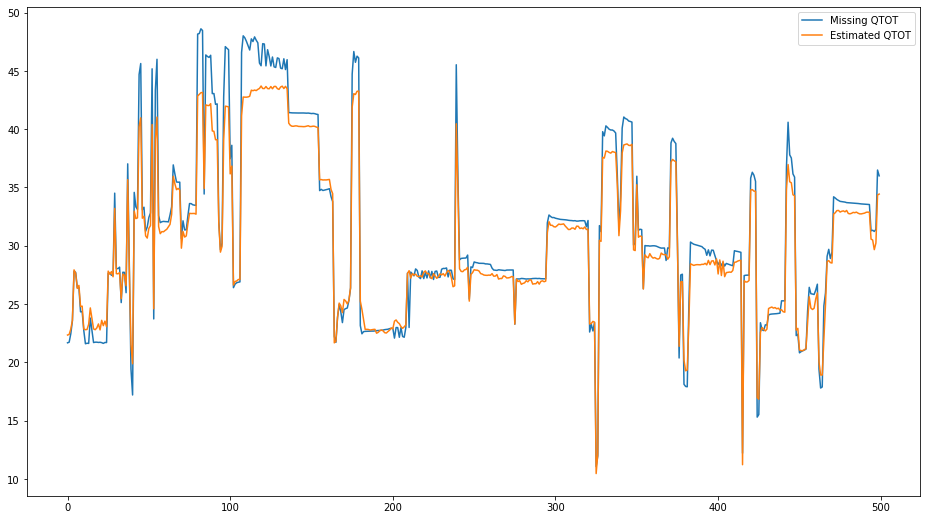

In [13]:
plt.figure(figsize=(16,9))
plt.plot(y_test.values, label='Missing QTOT')
plt.plot(predictions, label='Estimated QTOT')
plt.legend()